In [7]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 0:
        return X
    if dropout == 1:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return X * mask / (1. - dropout)


In [8]:
X = torch.arange(16, dtype=torch.float32, ).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 1.))
print(dropout_layer(X, 0.3))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[ 0.0000,  1.4286,  0.0000,  4.2857,  5.7143,  7.1429,  8.5714, 10.0000],
        [11.4286, 12.8571, 14.2857, 15.7143,  0.0000,  0.0000, 20.0000, 21.4286]])


In [9]:
dropout1, dropout2 = 0.2, 0.7
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256


class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.is_training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.is_training:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.is_training:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

KeyboardInterrupt: 

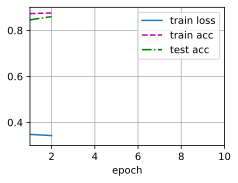

In [11]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [13]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.ReLU(), nn.Dropout(dropout1),
                    nn.Linear(256, 256), nn.ReLU(), nn.Dropout(dropout2),
                    nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.7, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

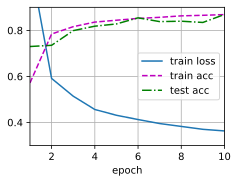

In [14]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)